In [169]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [170]:
data = pd.read_csv("C:/Users/mahle/Downloads/archive (17)/shopping_trends.csv")

In [171]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [172]:
data.shape

(3900, 19)

In [173]:
print("Missing values count:")
print(data.isnull().sum())

Missing values count:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [174]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


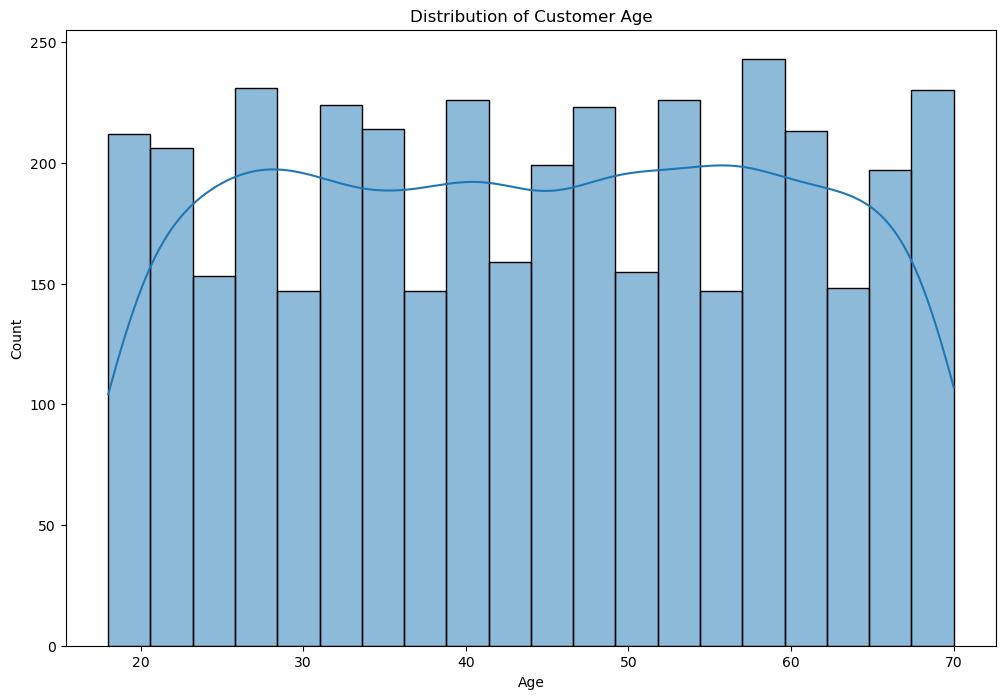

In [175]:
plt.figure(figsize=(12, 8))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

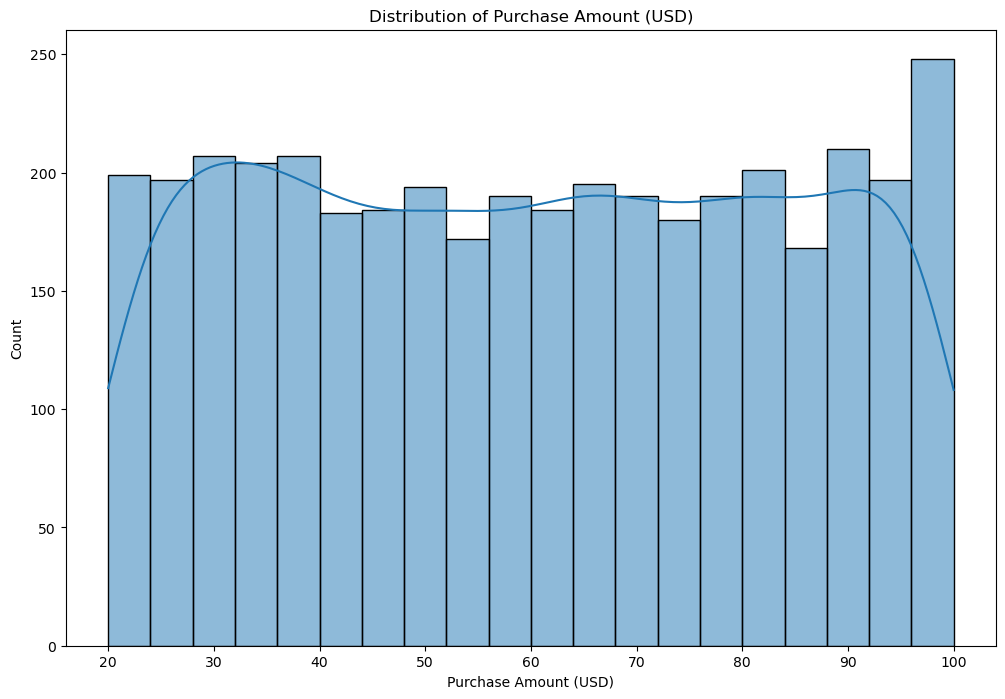

In [176]:
plt.figure(figsize=(12, 8))
sns.histplot(data['Purchase Amount (USD)'], bins=20, kde=True)
plt.title('Distribution of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.show()

In [177]:
selected_features = ['Age', 'Purchase Amount (USD)', 'Review Rating']

In [178]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
data_scaled = scaler.fit_transform(data[selected_features])

In [179]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

C:\Users\mahle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [180]:
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled, data['Cluster'])

0.5415920378232255

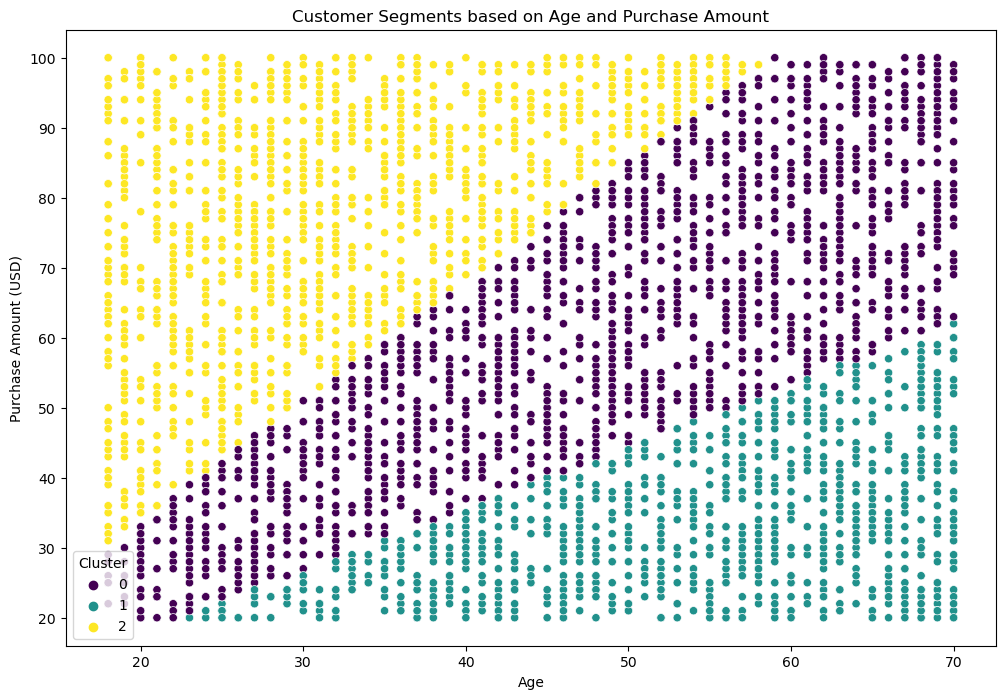

In [181]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Cluster', data=data, palette='viridis', legend='full')
plt.title('Customer Segments based on Age and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

In [182]:
# Analyze customer characteristics within each cluster
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster} Characteristics:")
    print(cluster_data.describe())


Cluster 0 Characteristics:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  1586.000000  1586.000000            1586.000000    1586.000000   
mean   1968.785624    48.201765              61.424968       3.750567   
std    1125.840387    13.971251              19.762367       0.720473   
min       1.000000    18.000000              20.000000       2.500000   
25%     967.250000    37.000000              46.000000       3.100000   
50%    1979.500000    50.000000              62.000000       3.700000   
75%    2940.750000    60.000000              77.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  Cluster  
count         1586.000000   1586.0  
mean            25.611602      0.0  
std             14.684973      0.0  
min              1.000000      0.0  
25%             13.000000      0.0  
50%             26.000000      0.0  
75%             38.000000      0.0  
max             50

In [183]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
cluster_means = data.groupby('Cluster')[numeric_columns].mean()
print("Cluster Characteristics:")
print(cluster_means)

Cluster Characteristics:
         Customer ID        Age  Purchase Amount (USD)  Review Rating  \
Cluster                                                                 
0        1968.785624  48.201765              61.424968       3.750567   
1        1924.586345  53.922691              33.444779       3.712048   
2        1948.078907  31.647951              77.655539       3.777845   

         Previous Purchases  Cluster  
Cluster                               
0                 25.611602      0.0  
1                 25.416667      1.0  
2                 24.989378      2.0  


In [184]:
for cluster in range(3):
    print(f"\nMarket Strategy for Cluster {cluster}:")
    cluster_data = data[data['Cluster'] == cluster]
    
    # Analyze customer behavior and preferences in this cluster
    # Example: Identify top-selling products, popular categories, preferred payment methods, etc.
    top_products = cluster_data['Item Purchased'].value_counts().head(3)
    popular_categories = cluster_data['Category'].value_counts().head(3)
    preferred_payment = cluster_data['Payment Method'].value_counts().idxmax()
    
    print(f"Top Products: {top_products.index.tolist()}")
    print(f"Popular Categories: {popular_categories.index.tolist()}")
    print(f"Preferred Payment Method: {preferred_payment}")


Market Strategy for Cluster 0:
Top Products: ['Shorts', 'Handbag', 'Sweater']
Popular Categories: ['Clothing', 'Accessories', 'Footwear']
Preferred Payment Method: Venmo

Market Strategy for Cluster 1:
Top Products: ['Jewelry', 'Coat', 'Jacket']
Popular Categories: ['Clothing', 'Accessories', 'Footwear']
Preferred Payment Method: PayPal

Market Strategy for Cluster 2:
Top Products: ['Shirt', 'Blouse', 'Hat']
Popular Categories: ['Clothing', 'Accessories', 'Footwear']
Preferred Payment Method: Credit Card


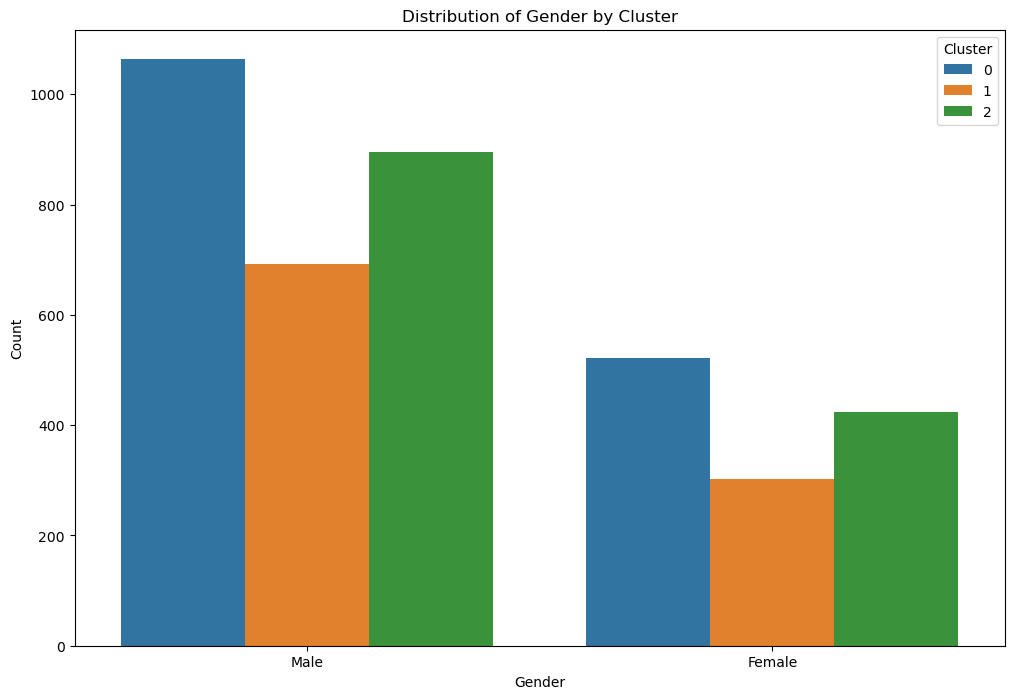

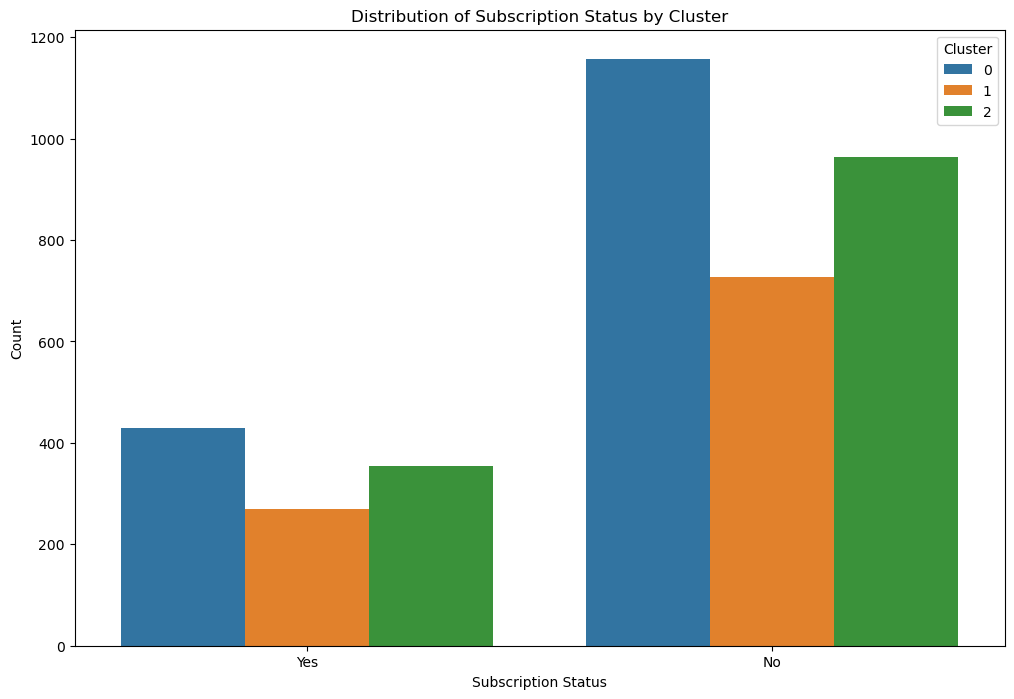

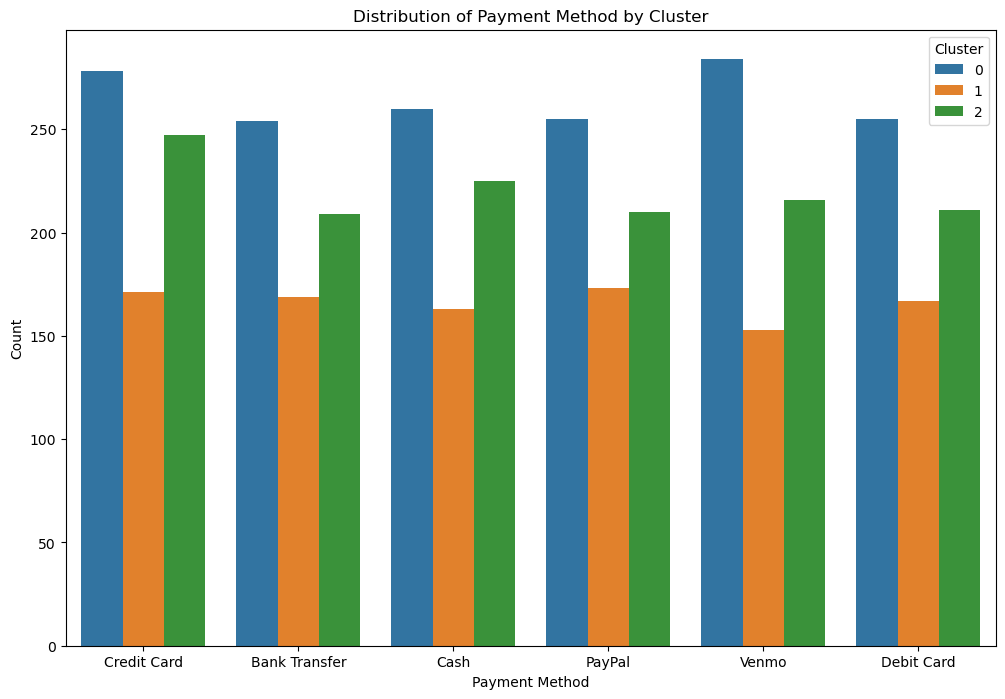

In [185]:
categorical_columns = ['Gender', 'Subscription Status', 'Payment Method']

for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, hue='Cluster', data=data)
    plt.title(f'Distribution of {column} by Cluster')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Cluster')
    plt.show()

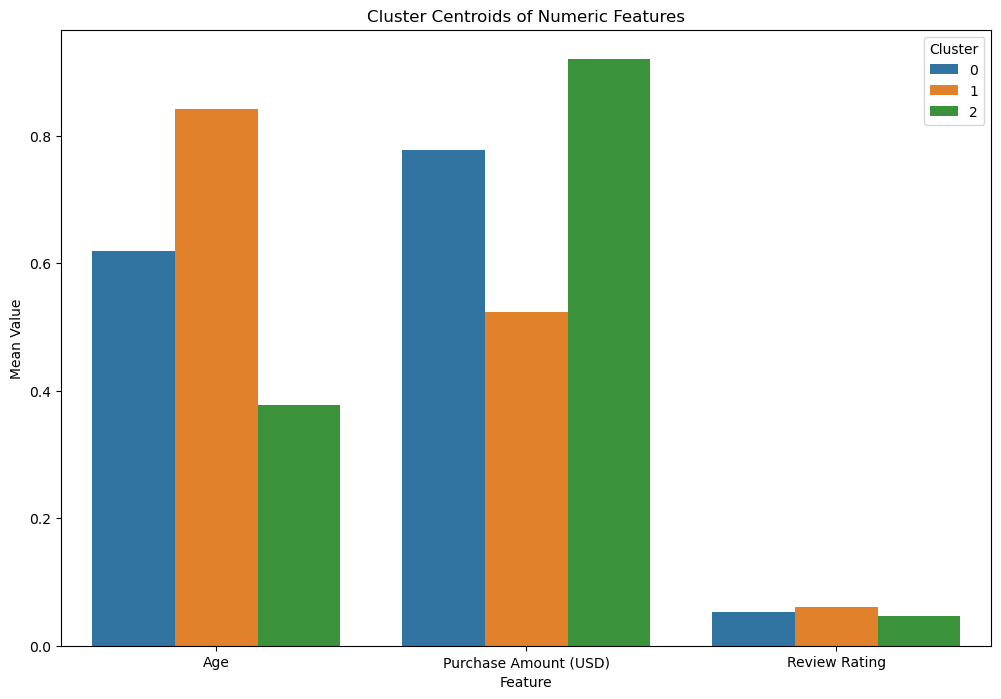

In [186]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=selected_features)
cluster_centers['Cluster'] = range(3)

plt.figure(figsize=(12, 8))
sns.barplot(data=cluster_centers.melt(id_vars='Cluster'), x='variable', y='value', hue='Cluster')
plt.title('Cluster Centroids of Numeric Features')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.legend(title='Cluster')
plt.show()

C:\Users\mahle\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

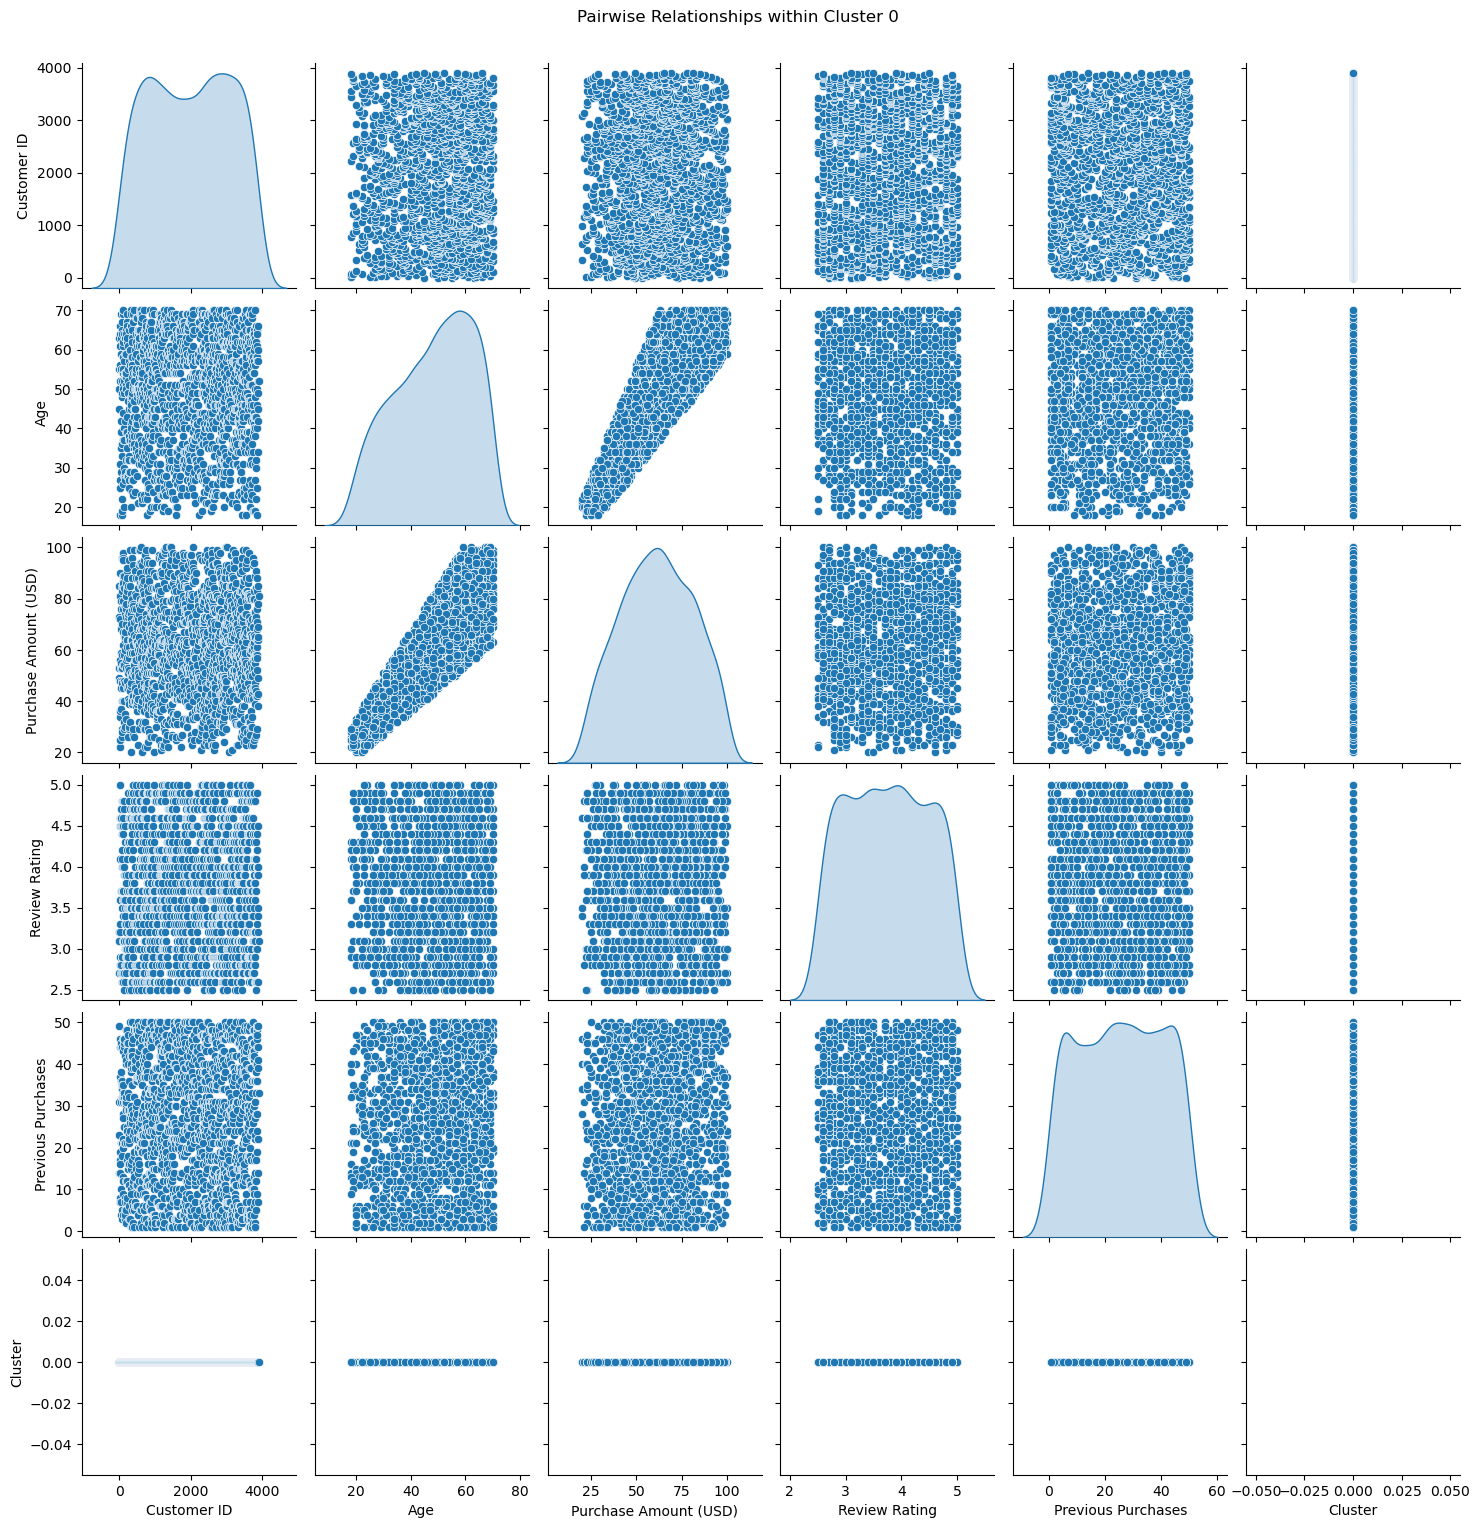

C:\Users\mahle\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

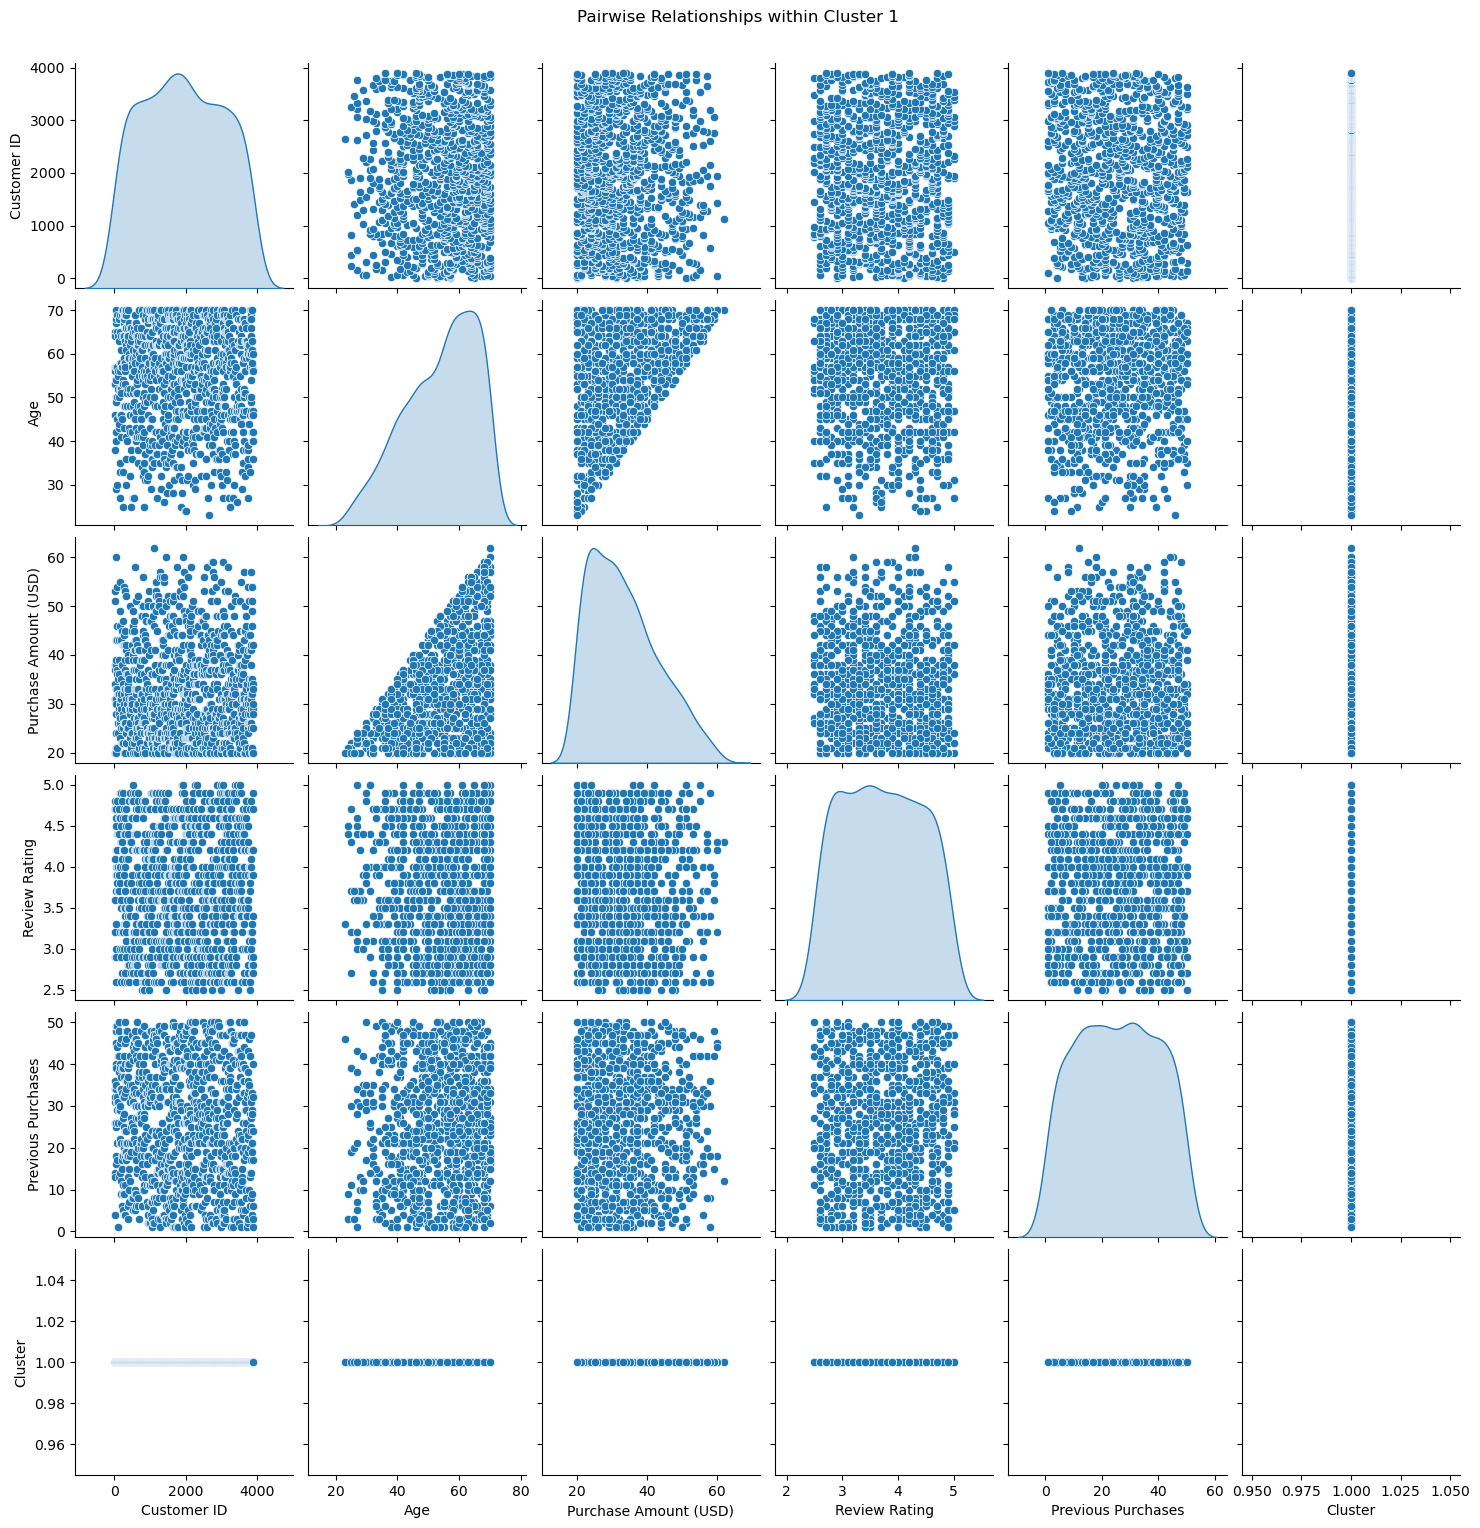

C:\Users\mahle\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

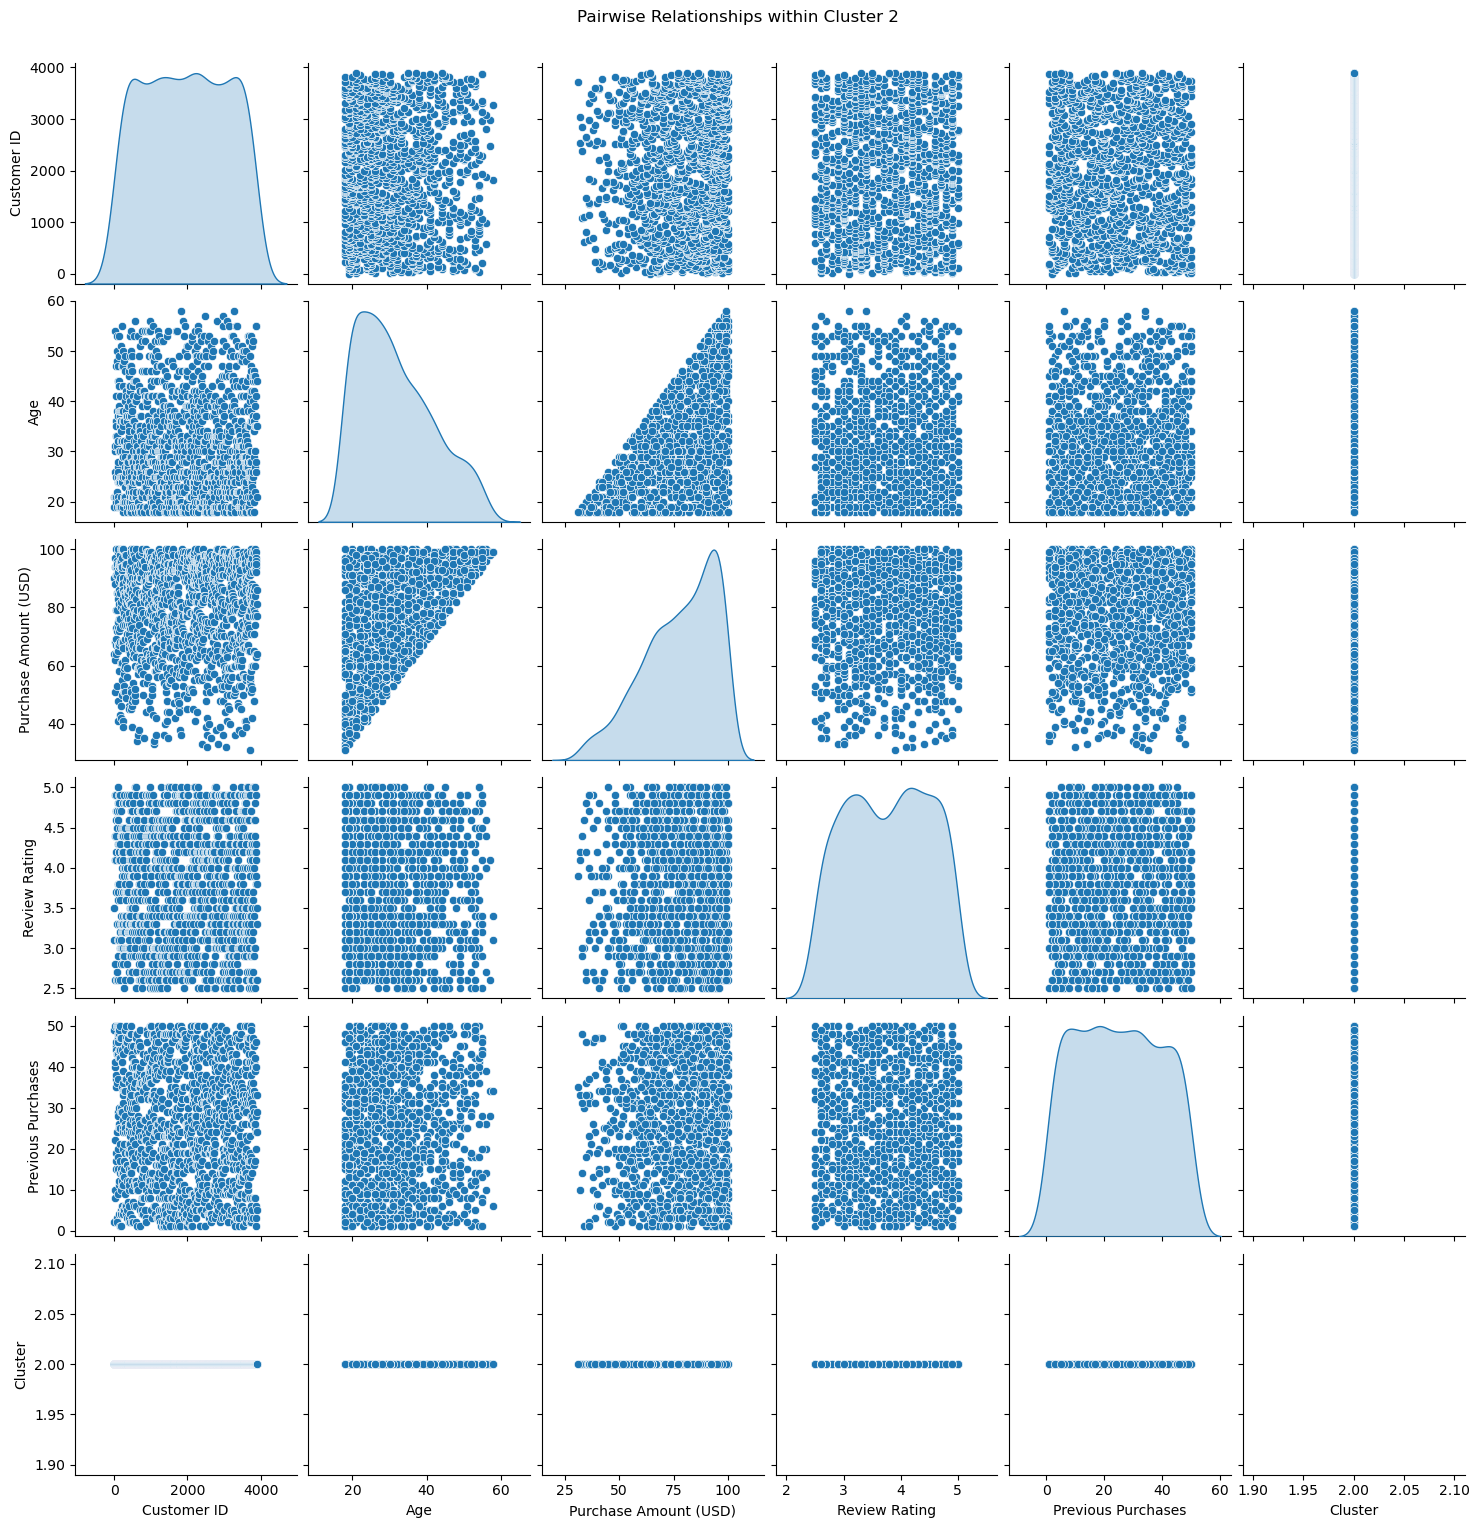

In [187]:
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    plt.figure(figsize=(12, 8))
    sns.pairplot(cluster_data[numeric_columns], diag_kind='kde')
    plt.suptitle(f'Pairwise Relationships within Cluster {cluster}', y=1.02)
    plt.show()